In [2]:
import pandas as pd
import numpy as np

In [3]:
grocery = pd.read_csv('Grocery_sales_dataset.csv')

In [4]:
grocery.head()

,Unnamed: 0,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,0,Milk packet,Dairy,80,9/1/2022,Thursday,False,18,1440,7:58,1022,Men
1,1,Bread package,Bakery,55,9/1/2022,Thursday,False,8,440,12:00,1011,Men
2,2,Butter,Dairy,285,9/1/2022,Thursday,False,15,4275,19:56,1078,Women
3,3,Milk packet,Dairy,80,9/1/2022,Thursday,False,12,960,9:21,1022,Men
4,4,Bread package,Bakery,55,9/1/2022,Thursday,False,16,880,7:22,1011,Men


In [5]:
grocery.drop(columns = ['Unnamed: 0', 'sales_time'], inplace = True)

In [6]:
grocery['sales_date'] = pd.to_datetime(grocery['sales_date'])

In [7]:
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
             5: 'May', 6: 'June', 7: 'July', 8: 'August',
             9: 'September', 10: 'October', 11: 'November', 12: 'December'}
grocery['month'] = grocery['sales_date'].dt.month.map(month_map)

In [8]:
grocery.head()

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,product_id,buyer_gender,month
0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,1022,Men,September
1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,1011,Men,September
2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,1078,Women,September
3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,1022,Men,September
4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,1011,Men,September


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='month', ylabel='number_of_items_sold'>

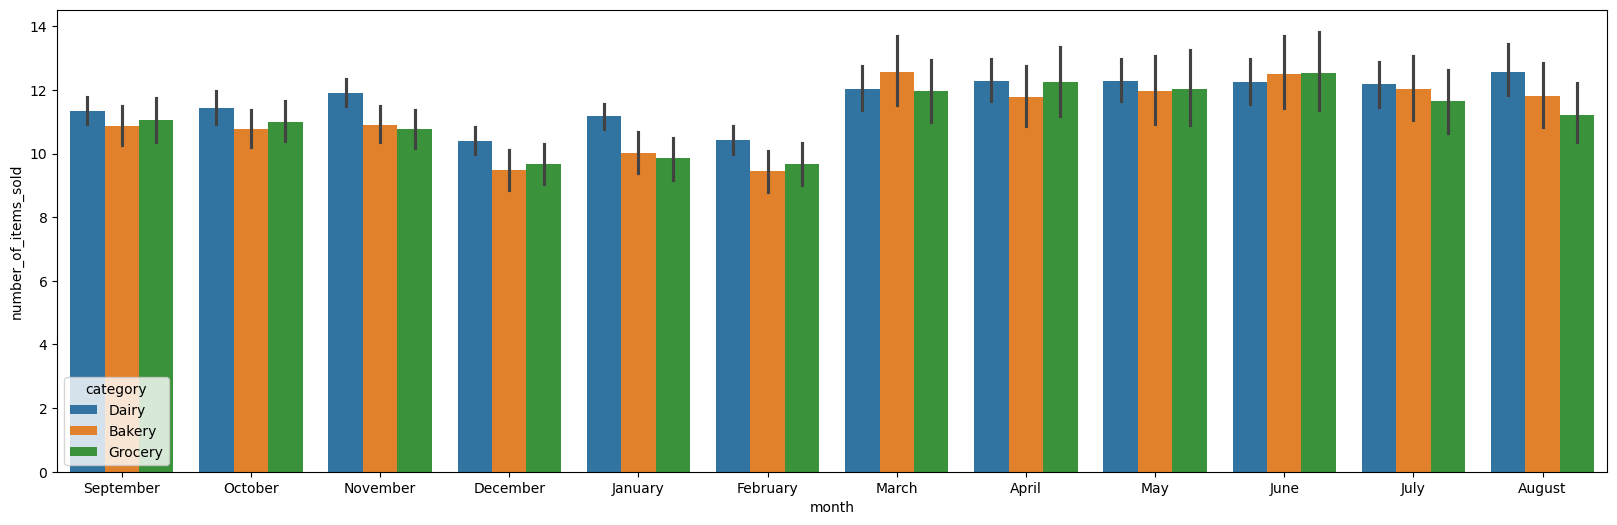

In [10]:
plt.figure(figsize = (20,6))
sns.barplot(x=grocery['month'],y=grocery['number_of_items_sold'],hue = grocery['category'])

<Axes: xlabel='month,product_name'>

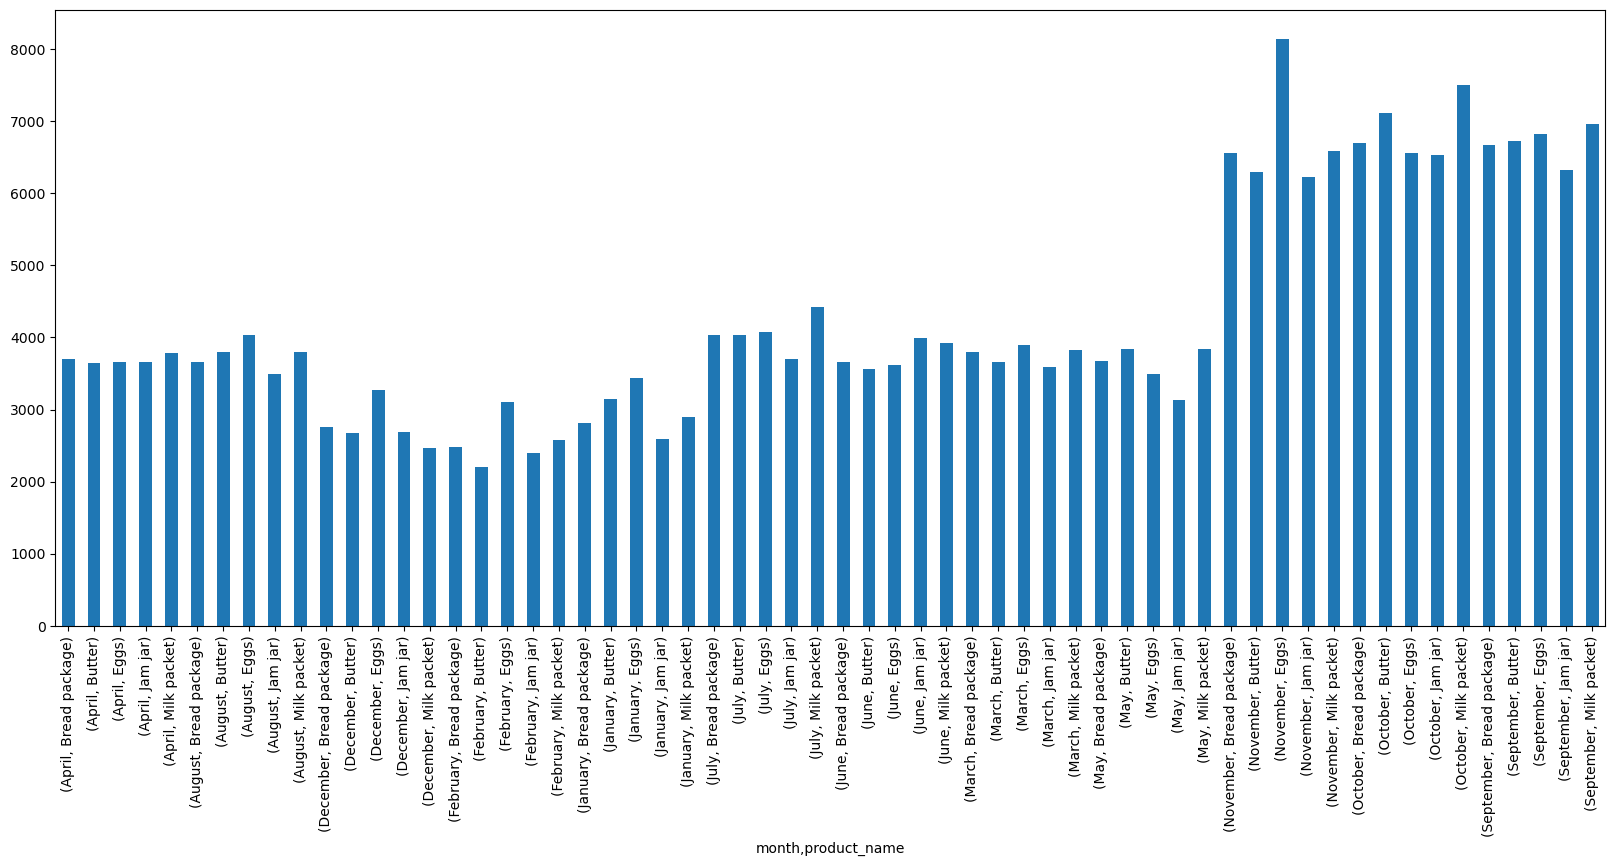

In [11]:
plt.figure(figsize = (20,8))
grocery.groupby(['month', 'product_name'])['number_of_items_sold'].sum().plot(kind = 'bar') 

<Axes: xlabel='month,day_of_week'>

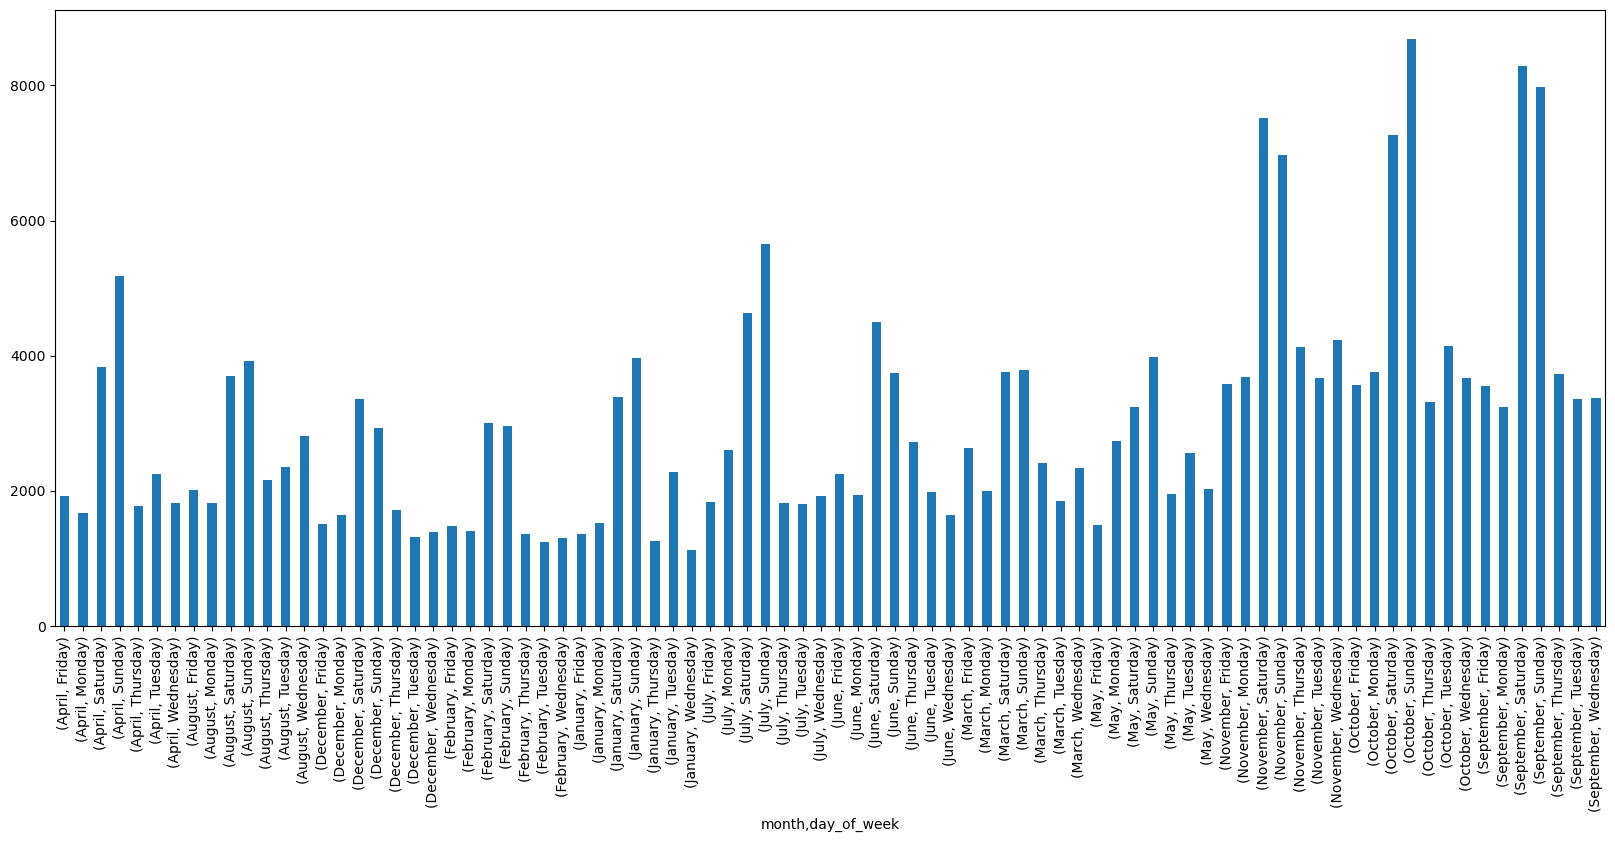

In [12]:
plt.figure(figsize = (20,8))
grocery.groupby(['month', 'day_of_week'])['number_of_items_sold'].sum().plot(kind = 'bar') 

In [66]:
milk_df = grocery[grocery['product_name'] == 'Milk packet']

In [68]:
milk_df = milk_df[['sales_date', 'number_of_items_sold']]

In [70]:
milk_df.set_index("sales_date", inplace=True)

In [72]:
milk_df = milk_df.resample("D").sum()

<Axes: xlabel='sales_date'>

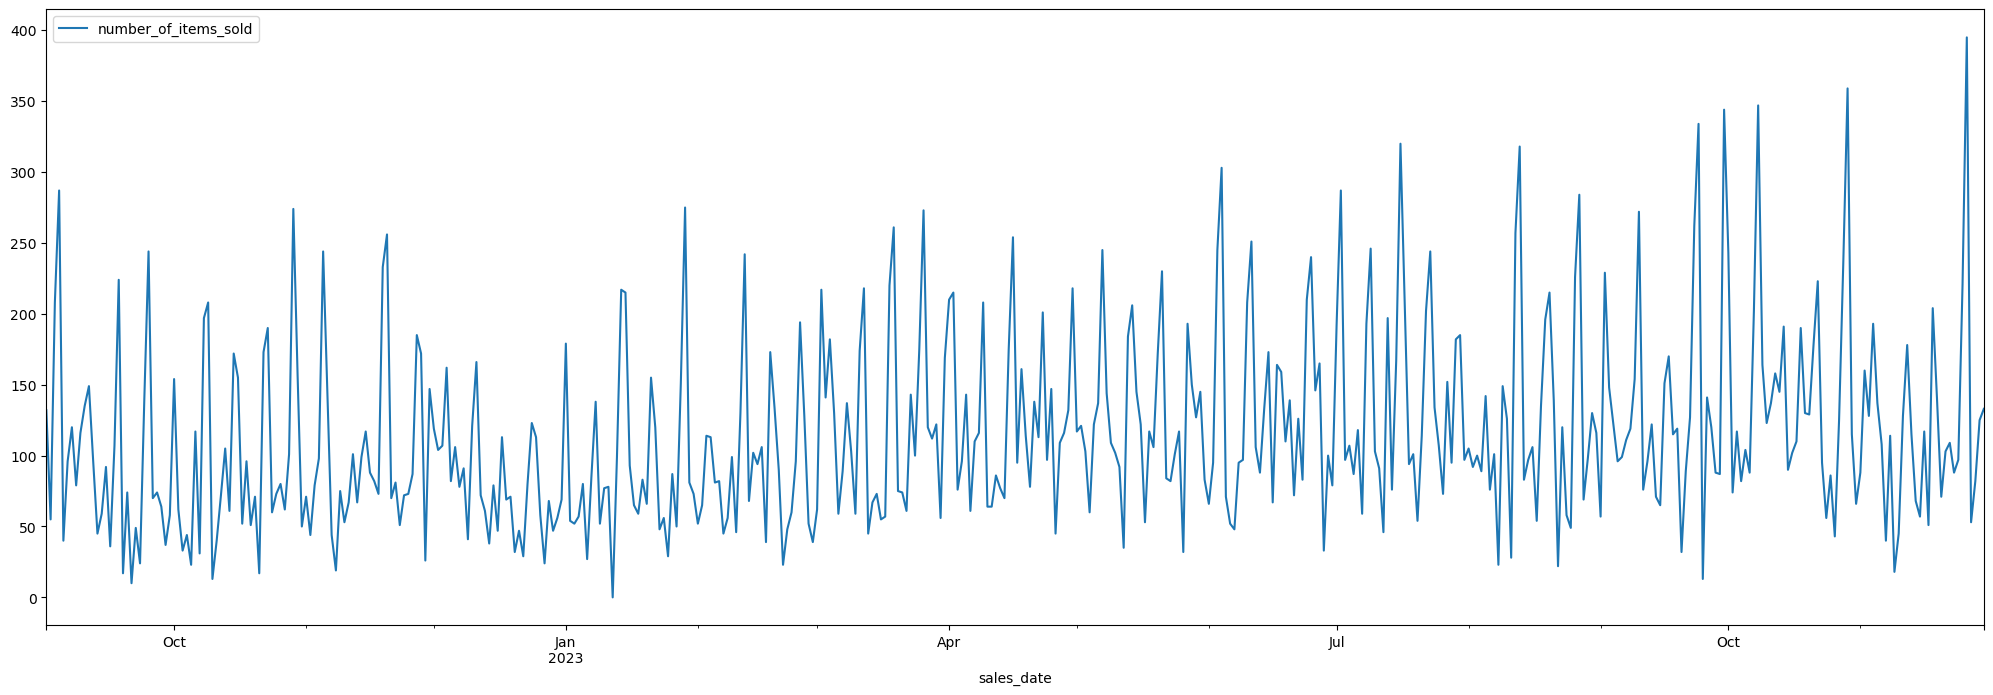

In [74]:
milk_df.plot(figsize = (25,8))

In [64]:
from statsmodels.tsa.stattools import adfuller

In [76]:
result = adfuller(milk_df['number_of_items_sold'])
result[1]

0.07370568541455007

In [80]:
milk_df['number_of_items_sold'] = np.log(milk_df['number_of_items_sold'])

C:\Users\PMLS\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='sales_date'>

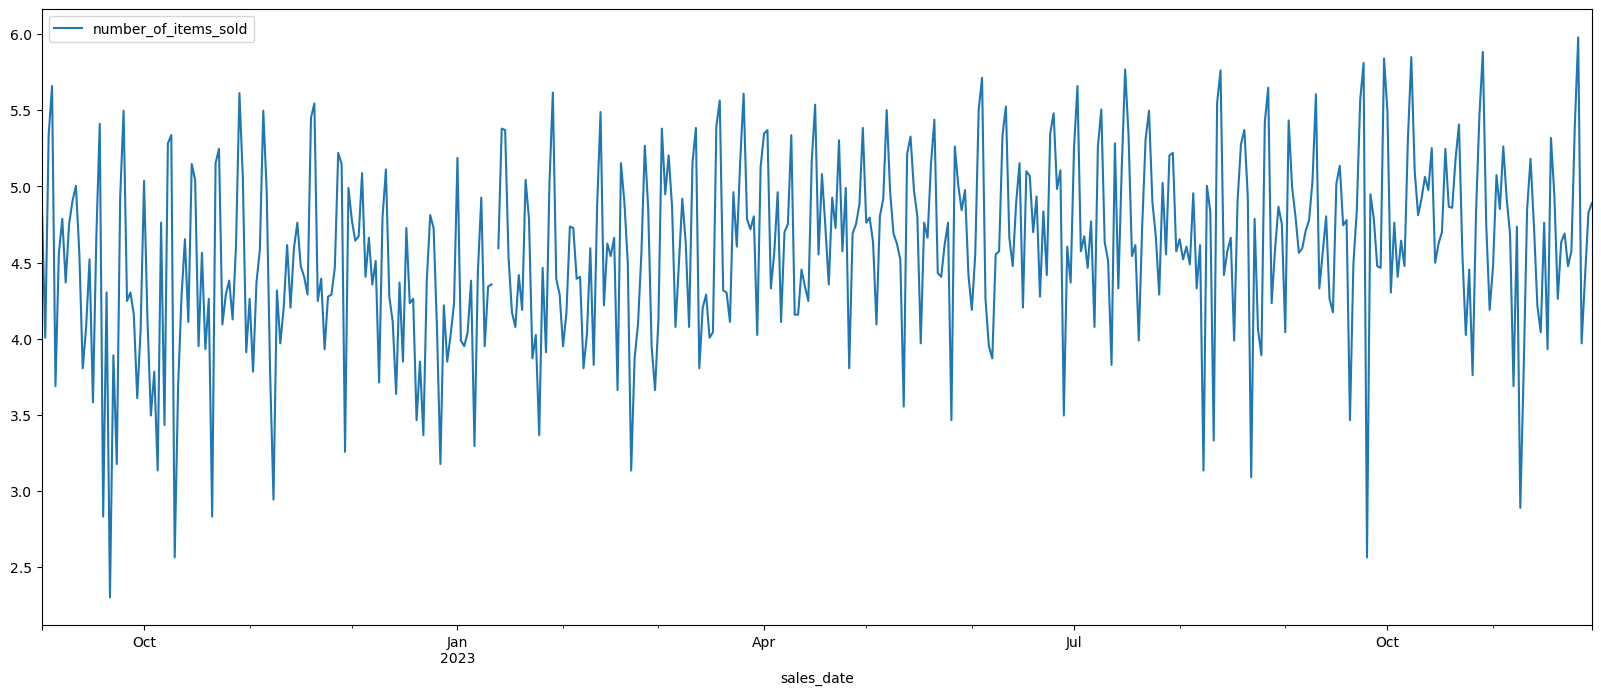

In [86]:
milk_df.plot(figsize = (20,8) )

In [90]:
milk_df['weekly difference'] = milk_df['number_of_items_sold'] - milk_df['number_of_items_sold'].shift(7)

In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(milk_df['number_of_items_sold'].dropna(), 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 7))
sarimax_result = model.fit(disp=False)
print(sarimax_result.summary())

C:\Users\PMLS\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\PMLS\anaconda3\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\PMLS\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


LinAlgError: Schur decomposition solver error.